In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [4]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res
  

In [8]:
X_st = X.copy().astype(float)
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [9]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [ ]:
# SGD

In [10]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [11]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [12]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.85677442  4.87130519  3.83746106  2.88797271] 99.8342227518959
200 [56.39962077  5.06891225  3.44758234  3.12269016] 41.38135746919208
300 [57.26733015  5.22841904  3.11243281  3.30316116] 40.1863769481761
400 [57.38240538  5.36509805  2.83306365  3.44975688] 40.04949916852782
500 [57.39766661  5.48188356  2.60017611  3.56910212] 39.966610874239024
600 [57.39969055  5.58140483  2.40600372  3.66644809] 39.909207853557895
700 [57.39995896  5.6660178   2.24408562  3.74599346] 39.86928576272823
800 [57.39999456  5.73781081  2.10904524  3.81110395] 39.84150507090234
900 [57.39999928  5.79861895  1.99640681  3.86448433] 39.82216550649565
1000 [57.3999999   5.85004336  1.90244336  3.90831346] 39.808697861147294


array([57.3999999 ,  5.85004336,  1.90244336,  3.90831346])

In [13]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
            if i % (iterations / 10) == 0:
                print(i, W, err)
    return W

In [14]:
eval_sgd_model(X_st, y, iterations=500, qty_in_batch=5, alpha=1e-2)

50 [36.13083428  2.96509397  4.98202018  2.88278938] 558.0551379124929
50 [36.32988303  3.07135644  5.07321665  3.003529  ] 447.47915491650656
100 [49.64279859  3.48879073  4.89414206  3.17665159] 122.94935469641334
100 [49.70404575  3.53456278  4.92608447  3.23494516] 83.62726214826174
150 [54.57743959  3.75350181  4.60937864  3.24603151] 53.02756661819335
150 [54.58915616  3.78017334  4.62259898  3.2843843 ] 46.320155600992805
200 [56.37974742  3.97831197  4.33727832  3.30051021] 40.06394266729497
200 [56.37341077  3.99780681  4.34369815  3.33156886] 44.46892456591654
250 [57.03795063  4.17988332  4.08784222  3.35225345] 37.211520103864956
250 [57.02501353  4.19640447  4.09165868  3.38048119] 44.960112798506984
300 [57.27825664  4.36173047  3.85967462  3.40180337] 36.60935318347756
300 [57.26290015  4.37683752  3.86242375  3.4288348 ] 44.940871910830275
350 [57.36592693  4.5260509   3.65095932  3.44907936] 36.630821457956685
350 [57.34967855  4.54034494  3.65321334  3.47552428] 44.58

array([57.39681066,  4.9437645 ,  3.12727487,  3.60241303])

In [15]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [16]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-3, lambda_=1e-2)

500 [36.41076739  3.18365658  3.47286894  4.37141883] 483.76224536549205
1000 [49.54362486  3.66171802  3.47672634  4.44827191] 102.81371448081981
1500 [54.34597741  3.93205133  3.32026914  4.3704939 ] 50.00287376692655
2000 [56.10207582  4.16174027  3.16715924  4.29754372] 42.16717178614423
2500 [56.74423642  4.36446197  3.02645654  4.23705108] 40.77726734824773
3000 [56.97905825  4.54397967  2.89772525  4.18757299] 40.41894043276512
3500 [57.06492663  4.70308305  2.780017    4.14738874] 40.269832901121234
4000 [57.09632652  4.84418754  2.67242234  4.11500384] 40.182101792342635
4500 [57.10780866  4.96941106  2.57410034  4.08914622] 40.12063412549103
5000 [57.11200739  5.08061334  2.48427584  4.06873584] 40.07394969467229


array([57.11200739,  5.08061334,  2.48427584,  4.06873584])

In [17]:
def eval_model_lasso(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ / 2 * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [18]:
eval_model_lasso(X_st, y, iterations=5000, alpha=0.005, lambda_=0.1)

500 [57.00128219  4.36314408  3.01454406  4.24432828] 40.50747346387284
1000 [57.37254449  5.09801828  2.45276215  4.07712518] 39.98305126350009
1500 [57.37498387  5.51548129  2.08672309  4.02979635] 39.85552236022591
2000 [57.37499989  5.75642954  1.84948014  4.0288722 ] 39.80863441061779
2500 [57.375       5.89760138  1.69632062  4.04271694] 39.79074887970551
3000 [57.375       5.98146048  1.59773797  4.05866585] 39.78375096197525
3500 [57.375       6.03189013  1.53442764  4.07234814] 39.78096374551929
4000 [57.375       6.0625426   1.49383946  4.08280496] 39.779838864763704
4500 [57.375       6.08134453  1.46785275  4.0903269 ] 39.77937976933278
5000 [57.375       6.09296573  1.45123153  4.0955443 ] 39.779190242235195


array([57.375     ,  6.09296573,  1.45123153,  4.0955443 ])

#### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока)
#### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации

In [19]:
def eval_model_ridge(X, y, iterations, alpha=1e-2, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        #if i % (iterations / 10) == 0:
        #   print(i, W, err)
    return W

In [20]:
def eval_model_lasso(X, y, iterations, alpha=1e-2, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_  * np.sign(W) / 2) 
        #if i % (iterations / 10) == 0:
        #    print(i, W, err)
    return W

In [21]:
lambdas = np.linspace(0.001, 2, 100)
lambdas

array([1.00000000e-03, 2.11919192e-02, 4.13838384e-02, 6.15757576e-02,
       8.17676768e-02, 1.01959596e-01, 1.22151515e-01, 1.42343434e-01,
       1.62535354e-01, 1.82727273e-01, 2.02919192e-01, 2.23111111e-01,
       2.43303030e-01, 2.63494949e-01, 2.83686869e-01, 3.03878788e-01,
       3.24070707e-01, 3.44262626e-01, 3.64454545e-01, 3.84646465e-01,
       4.04838384e-01, 4.25030303e-01, 4.45222222e-01, 4.65414141e-01,
       4.85606061e-01, 5.05797980e-01, 5.25989899e-01, 5.46181818e-01,
       5.66373737e-01, 5.86565657e-01, 6.06757576e-01, 6.26949495e-01,
       6.47141414e-01, 6.67333333e-01, 6.87525253e-01, 7.07717172e-01,
       7.27909091e-01, 7.48101010e-01, 7.68292929e-01, 7.88484848e-01,
       8.08676768e-01, 8.28868687e-01, 8.49060606e-01, 8.69252525e-01,
       8.89444444e-01, 9.09636364e-01, 9.29828283e-01, 9.50020202e-01,
       9.70212121e-01, 9.90404040e-01, 1.01059596e+00, 1.03078788e+00,
       1.05097980e+00, 1.07117172e+00, 1.09136364e+00, 1.11155556e+00,
      

In [22]:
alpha = 0.01

In [23]:
weights_ridge = []
weights_lasso = []
for lambda_ in lambdas:
    weights_ridge.append(eval_model_ridge(X_st, y, iterations=500, alpha=alpha, lambda_=lambda_))
    weights_lasso.append(eval_model_lasso(X_st, y, iterations=500, alpha=alpha, lambda_=lambda_))
    
weights_ridge = np.array(weights_ridge)
weights_lasso = np.array(weights_lasso)

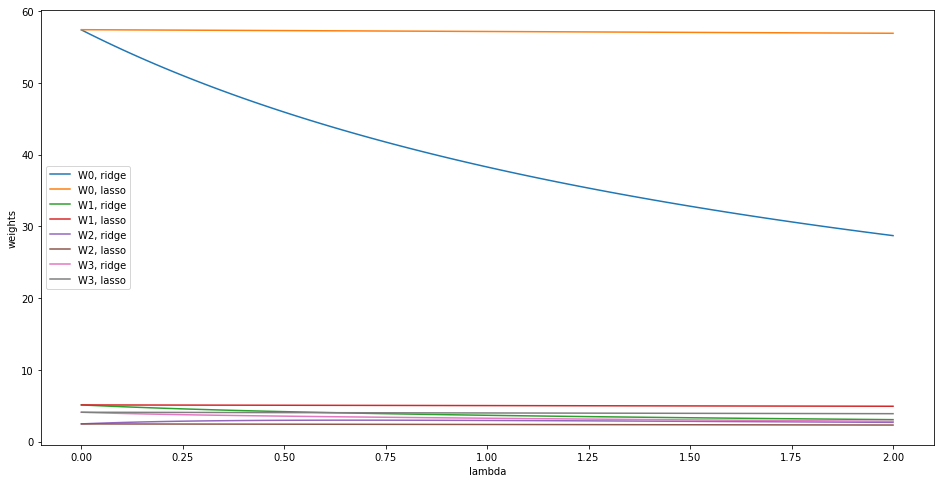

In [24]:
plt.figure(figsize=(16,8))
for i in range(4):
    plt.plot(lambdas, weights_ridge[:,i], label=f'W{i}, ridge')
    plt.plot(lambdas, weights_lasso[:,i], label=f'W{i}, lasso')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('weights')
plt.show()

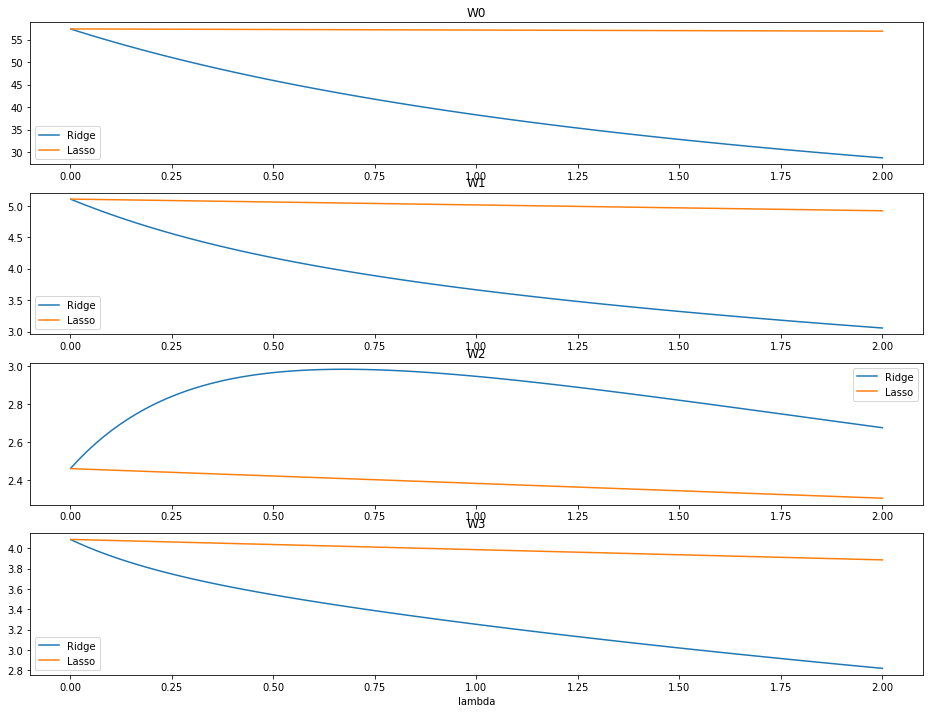

In [25]:
fig, axs = plt.subplots(4, figsize=(16,12))
for i in range(4):
    axs[i].plot(lambdas, weights_ridge[:,i], label='Ridge')
    axs[i].plot(lambdas, weights_lasso[:,i], label='Lasso')
    axs[i].set_title(f'W{i}')
    axs[i].legend()
    
plt.xlabel('lambda')    
plt.show()

In [26]:
y_ = np.array(y)
y_mean = y_.mean()
y_std = y_.std()
y_mean, y_std

(57.4, 12.877888025604198)

In [27]:
y_ = calc_std_feat(y_)
y_

array([-0.96289081, -0.18636596, -0.57462839,  0.12424398,  0.59015888,
       -1.73941565,  1.36668373,  1.75494615, -0.57462839,  0.20189646])

In [28]:
W_ = eval_model_ridge(X_st, y_, iterations=10000, alpha=0.005, lambda_=0.01)
W_

array([9.63193443e-17, 4.66597777e-01, 1.20701373e-01, 3.16932628e-01])

In [29]:
y_pred_st = np.dot(W_, X_st)
y_pred_normal = y_pred_st * y_std + y_mean
y_pred_normal

array([48.78574149, 49.42685872, 56.95886238, 49.1063001 , 61.3487705 ,
       47.6014195 , 71.026772  , 83.35955421, 48.62546218, 57.76025892])

In [30]:
calc_mse(y, y_pred_normal)

39.78089955385961

In [31]:
W = eval_model_ridge(X_st, y, iterations=10000, alpha=0.005, lambda_=0.01)
W

array([57.11442786,  6.00884367,  1.55430528,  4.0814476 ])

In [32]:
y_pred_ = np.dot(W, X_st)
y_pred_

array([48.50019077, 49.14127768, 56.67332317, 48.82073423, 61.06314297,
       47.31580554, 70.74120406, 83.07399934, 48.33991904, 57.47468181])

In [33]:
calc_mse(y, y_pred_)

39.86244814022416

In [34]:
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

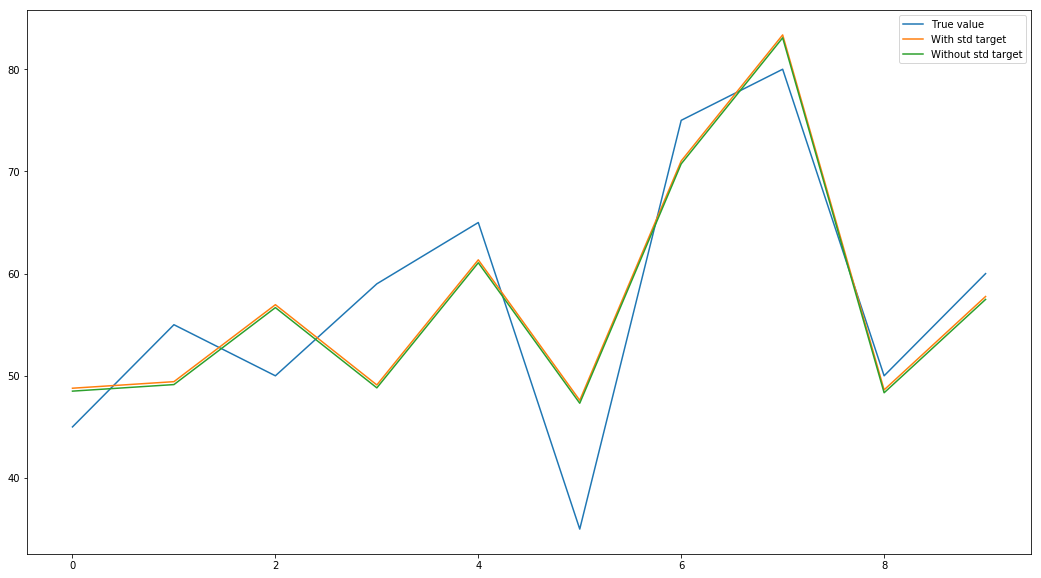

In [35]:
plt.figure(figsize=(18,10))
plt.plot(range(10), y, label='True value')
plt.plot(range(10), y_pred_normal, label='With std target')
plt.plot(range(10), y_pred_, label='Without std target')
plt.legend()
plt.show()

In [36]:
lambdas = np.logspace(-4, 0, 5)
lambdas

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [37]:
def generate_predictions(lambdas):
    predictions = []
    for lambda_ in lambdas:
        w = eval_model_ridge(X_st, y, iterations=10000, alpha=0.005, lambda_=lambda_)
        predictions.append(np.dot(w, X_st))
    predictions = np.array(predictions)
    return predictions


In [38]:
predictions = generate_predictions(lambdas)
predictions

array([[48.8095839 , 49.39945018, 57.00283351, 49.10451704, 61.25344558,
        47.50830319, 71.04290904, 83.4479753 , 48.66211734, 57.74016635],
       [48.78115921, 49.37592717, 56.97251657, 49.07854319, 61.23648559,
        47.49102999, 71.01535614, 83.41368183, 48.63246722, 57.71597652],
       [48.50019077, 49.14127768, 56.67332317, 48.82073423, 61.06314297,
        47.31580554, 70.74120406, 83.07399934, 48.33991904, 57.47468181],
       [45.94229054, 46.87304846, 53.97207053, 46.4076695 , 59.12682688,
        45.44132382, 68.12295255, 79.93536538, 45.70960106, 55.13551794],
       [30.37380255, 31.58788583, 37.36454358, 30.98084419, 42.92296893,
        30.88579362, 50.00876053, 59.589638  , 30.07028173, 38.88214769]])

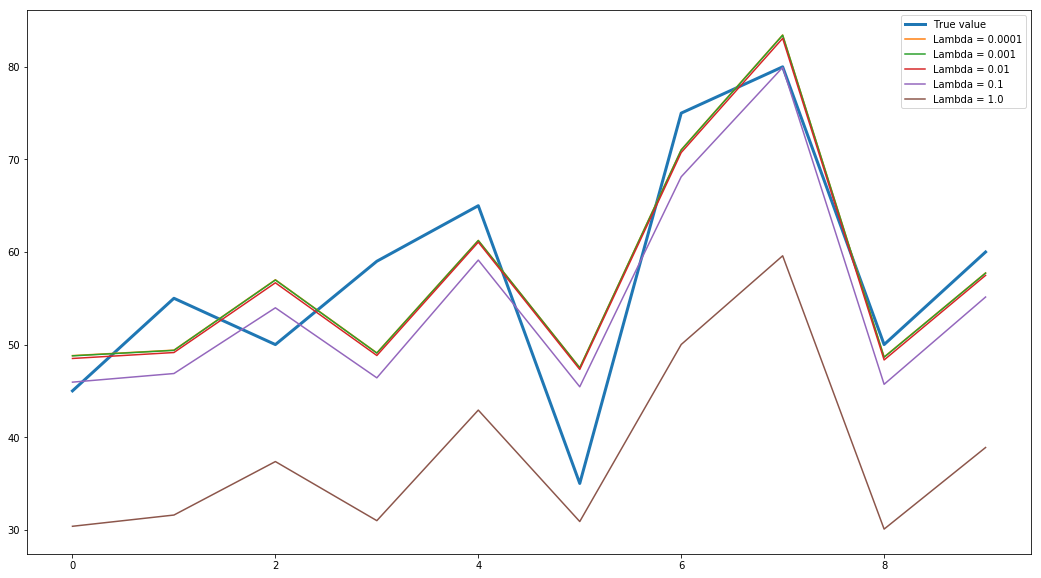

In [39]:
plt.figure(figsize=(18,10))
plt.plot(range(10), y, label='True value', linewidth=3)

for lambda_, pred in zip(lambdas, predictions):
    plt.plot(range(10), pred, label=f'Lambda = {lambda_}')

plt.legend()
plt.show()

#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [40]:
def calc_std_feat(x):
    return (x - x.mean()) / x.std()

def calc_norm_feat(x):
    return (x - x.min()) / (x.max() - x.min())

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([ 450.,  605.,  760.,  915., 1070., 1225., 1380., 1535., 1690.,
        1845., 2000.]),
 <a list of 10 Patch objects>)

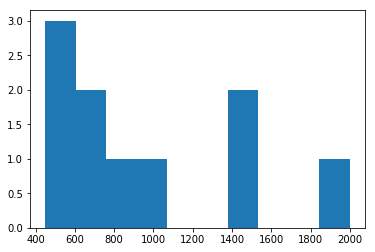

In [41]:
plt.hist(X[2])

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

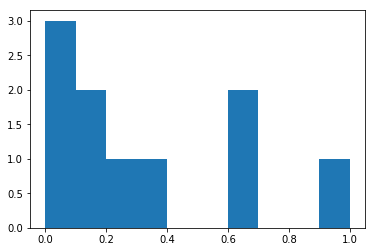

In [42]:
plt.hist(calc_norm_feat(X[2]))

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <a list of 10 Patch objects>)

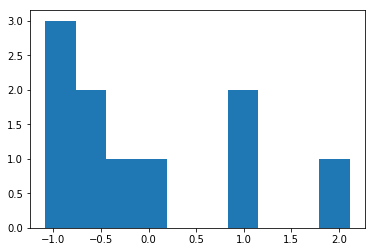

In [43]:
plt.hist(calc_std_feat(X[2]))

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

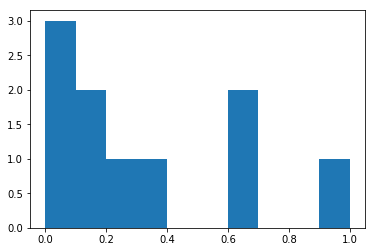

In [44]:
plt.hist(calc_norm_feat(calc_std_feat(X[2])))

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <a list of 10 Patch objects>)

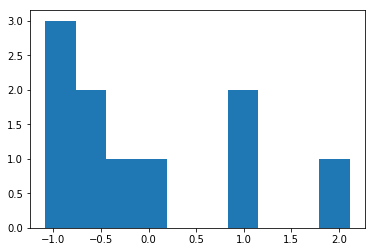

In [45]:
plt.hist(calc_std_feat(calc_norm_feat(X[2])))

In [46]:
print(calc_std_feat(X[2]))
print(calc_std_feat(calc_norm_feat(X[2])))

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]


In [47]:
print(calc_norm_feat(X[2]))
print(calc_norm_feat(calc_std_feat(X[2])))

[0.03225806 0.16129032 0.19354839 0.09677419 0.64516129 0.22580645
 0.67741935 1.         0.         0.35483871]
[0.03225806 0.16129032 0.19354839 0.09677419 0.64516129 0.22580645
 0.67741935 1.         0.         0.35483871]


#### Как видим выше, применяя стандартизацию или нормализацию мы никак не влияем на распределение величины, мы просто масштабируем признак и сдвигаем матожидание. На примере выше показано, что применять стандартизацию а потом нормализацию не имеет смысла, т.к. такой же результат мы получим, применив только нормализацию и т.д.